In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data_new.xlsx')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date,DateClaimed,Date_Diff
0,12,5,3,Honda,Urban,2,1,1,Female,Single,...,No,External,none,1 year,3 to 4,1994,Liability,1994-12-29,1994-01-05,-358
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,No,External,none,no change,1 vehicle,1994,Collision,1994-01-20,1994-01-25,5
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,No,External,none,no change,1 vehicle,1994,Collision,1994-10-29,1994-11-11,13
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-12,1994-07-02,20
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,No,External,none,no change,1 vehicle,1994,Collision,1994-02-01,1994-02-09,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,11,4,5,Toyota,Urban,2,11,5,Male,Married,...,No,External,none,no change,1 vehicle,1996,Collision,1996-11-23,1996-12-04,11
15415,11,5,4,Pontiac,Urban,5,12,1,Male,Married,...,No,External,more than 5,no change,3 to 4,1996,Liability,1996-11-29,1996-12-07,8
15416,11,5,4,Toyota,Rural,5,12,1,Male,Single,...,No,External,1 to 2,no change,1 vehicle,1996,Collision,1996-11-29,1996-12-07,8
15417,12,1,1,Toyota,Urban,4,12,2,Female,Married,...,No,External,more than 5,no change,1 vehicle,1996,All Perils,1996-12-03,1996-12-13,10


In [4]:
X = df[['AccidentArea',
        'Sex',
        'MaritalStatus',
        'Age', 
        'Fault', 
        'VehicleCategory', 
        'VehiclePrice', 
        'RepNumber', 
        'Deductible', 
        'DriverRating', 
        'Days_Policy_Accident',
        'Days_Policy_Claim',
        'PastNumberOfClaims',
        'AgeOfVehicle',
        'PoliceReportFiled',
        'WitnessPresent',
        'AgentType',
        'NumberOfSuppliments',
        'AddressChange_Claim',
        'NumberOfCars',
        'BasePolicy',
        'Date_Diff']]

    

y = df['FraudFound_P']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15419, 22)
(15419,)
(12335, 22)
(3084, 22)
(12335,)
(3084,)


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


categorical_columns =  ['AccidentArea',
                        'Sex',
                        'MaritalStatus',
                        'Fault', 
                        'VehicleCategory', 
                        'VehiclePrice',
                        'Days_Policy_Accident',
                        'Days_Policy_Claim',
                        'PastNumberOfClaims',
                        'AgeOfVehicle',
                        'PoliceReportFiled',
                        'WitnessPresent',
                        'AgentType',
                        'NumberOfSuppliments',
                        'AddressChange_Claim',
                        'NumberOfCars',
                        'BasePolicy']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # This will keep non-categorical columns unchanged
)

# Step 4: Fit and transform X_train
X_train_encoded = preprocessor.fit_transform(X_train)

# Step 5: Transform X_test using the same transformer
X_test_encoded = preprocessor.transform(X_test)

print(X_train_encoded.shape)

(12335, 67)


In [6]:
from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")
X_train_encoded.shape, X_test_encoded.shape, y_train.shape, y_test.shape

Training target statistics: Counter({0: 11602, 1: 733})
Testing target statistics: Counter({0: 2894, 1: 190})


((12335, 67), (3084, 67), (12335,), (3084,))

In [7]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(
                                                                        class_weight='balanced',
                                                                        classes= np.unique(y_train), 
                                                                        y = y_train)))
class_weights

{0: 0.5315893811411826, 1: 8.414051841746248}

In [8]:
# Models from scikit-learn & XGboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2


# Model Evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve
# For Hyperparameter tunning of Xgboost
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [9]:
models = {"Random Forest Classifier": RandomForestClassifier(class_weight=class_weights)}

# Let's create a function to fit and later score our models
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models
    """
    # random seed for reproduction
    np.random.seed(42)
    
    # Let's create a empty dictionary to keep model score
    accuracy = {}
    precision = {}
    recall = {}
    f1 = {}
    auc_roc = {}
    
    
    # Let's loop through the models dictionary
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the score and append it
        accuracy[name] = model.score(X_test,y_test)
        predictions = model.predict(X_test)
        precision[name] = precision_score(y_test, predictions)
        recall[name] = recall_score(y_test, predictions)
        f1[name] = f1_score(y_test, predictions)
        predictions_proba = model.predict_proba(X_test)[:, 1] 
        auc_roc[name] = roc_auc_score(y_test, predictions_proba)

    return {'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_roc': auc_roc}

In [10]:
model_score = fit_score(models=models,
                        X_train=X_train_encoded,
                        X_test=X_test_encoded,
                        y_train=y_train,
                        y_test=y_test)
model_score

{'accuracy': {'Random Forest Classifier': 0.9377431906614786},
 'precision': {'Random Forest Classifier': 0.4},
 'recall': {'Random Forest Classifier': 0.021052631578947368},
 'f1_score': {'Random Forest Classifier': 0.039999999999999994},
 'auc_roc': {'Random Forest Classifier': 0.7914741934310552}}

[[1633 1261]
 [  12  178]]
Random Forest Classifier TPR - FPR: 0.5011130105845125


C:\Users\mings\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


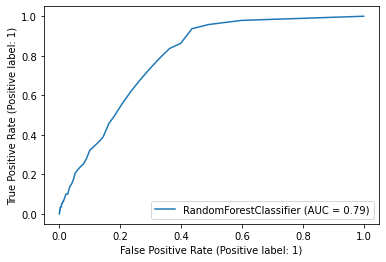

In [22]:
for model_name, model in models.items():
    predictions_proba = model.predict_proba(X_test_encoded)[:, 1]  # Probability estimates for positive class

    # Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) using ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

    # Find the threshold that maximizes TPR - FPR
    best_threshold_index = np.argmax(tpr - fpr)
    best_threshold = thresholds[best_threshold_index]

    # Apply the threshold to get binary predictions
    binary_predictions = (predictions_proba >= best_threshold).astype(int)

    # Calculate TPR and FPR using the confusion matrix
    confusion = confusion_matrix(y_test, binary_predictions)
    tn, fp, fn, tp = confusion.ravel()

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # Calculate TPR - FPR
    tpr_minus_fpr = tpr - fpr
    print(confusion)
    print(model_name, "TPR - FPR:", tpr_minus_fpr)
    plot_roc_curve(model, X_test_encoded ,y_test)

In [12]:
np.random.seed(42)

def fraud_scoring(y_true, y_pred):
    # Assuming 1 indicates fraud and 0 indicates non-fraud
    recall = recall_score(y_true, y_pred)
    # You might customize this function based on your specific goals
    return recall

rf_random_grid = {"n_estimators": np.arange(10,1000,50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)} 

# Setup random hyperparameter search for RandomForestClassifer
rf_rs = RandomizedSearchCV(RandomForestClassifier(class_weight=class_weights),
                           param_distributions=rf_random_grid,
                           cv=5,
                           verbose=True,
                           n_iter=10,
                           scoring=make_scorer(fraud_scoring, greater_is_better=True))

# Fitting random hyperparamter search
rf_rs.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 0.5315893811411826,
                                                                  1: 8.414051841746248}),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring=make_scorer(fraud_scoring), verbose=True)

In [13]:
rf_rs.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [14]:
accuracy = rf_rs.score(X_test_encoded,y_test)
predictions = rf_rs.predict(X_test_encoded)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
predictions_proba = rf_rs.predict_proba(X_test_encoded)[:, 1] 
auc_roc = roc_auc_score(y_test, predictions_proba)

accuracy, precision, recall, f1, auc_roc

(0.9526315789473684,
 0.12928571428571428,
 0.9526315789473684,
 0.22767295597484274,
 0.8091641508747682)

In [15]:
predictions_proba = rf_rs.predict_proba(X_test_encoded)[:, 1]  # Probability estimates for positive class

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

# Find the threshold that maximizes TPR - FPR
best_threshold_index = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_index]

# Apply the threshold to get binary predictions
binary_predictions = (predictions_proba >= best_threshold).astype(int)

# Calculate TPR and FPR using the confusion matrix
confusion = confusion_matrix(y_test, binary_predictions)
tn, fp, fn, tp = confusion.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

# Calculate TPR - FPR
tpr_minus_fpr = tpr - fpr
print(confusion)
print("TPR - FPR:", tpr_minus_fpr)

[[1676 1218]
 [   9  181]]
TPR - FPR: 0.5317608118430146


C:\Users\mings\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


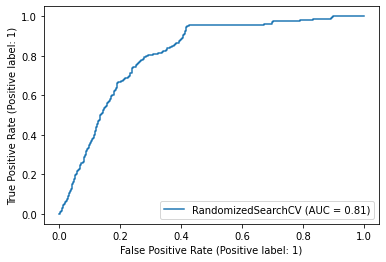

In [24]:
plot_roc_curve(rf_rs, X_test_encoded ,y_test)

In [16]:
def maximize_tpr_minus_fpr(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion.ravel()

    # Calculate TPR (Sensitivity/Recall) and FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # Maximize TPR - FPR
    return tpr - fpr

rf_random_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
    "max_leaf_nodes": [None, 10, 20, 50],
    "max_samples": [None, 0.5, 0.7, 0.9],
    "min_impurity_decrease": [0.0, 0.1, 0.2]
}


# Setup random hyperparameter search for RandomForestClassifer
rf_rs_2 = RandomizedSearchCV(RandomForestClassifier(class_weight=class_weights),
                           param_distributions=rf_random_grid,
                           cv=5,
                           verbose=True,
                           n_iter=10,
                           scoring=make_scorer(maximize_tpr_minus_fpr, greater_is_better=True))

# Fitting random hyperparamter search
rf_rs_2.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\mings\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mings\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mings\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 0.5315893811411826,
                                                                  1: 8.414051841746248}),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 10, 20, 50],
                                        'max_samples': [None, 0.5, 0.7, 0.9],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12

In [17]:
rf_rs_2.best_params_

{'n_estimators': 560,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': 0.9,
 'max_leaf_nodes': 10,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [18]:
accuracy = rf_rs_2.score(X_test_encoded,y_test)
predictions = rf_rs_2.predict(X_test_encoded)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
predictions_proba = rf_rs_2.predict_proba(X_test_encoded)[:, 1] 
auc_roc = roc_auc_score(y_test, predictions_proba)

accuracy, precision, recall, f1, auc_roc

(0.5302986214672825,
 0.12977649603460706,
 0.9473684210526315,
 0.22828154724159794,
 0.8372440257520096)

In [19]:
predictions_proba = rf_rs_2.predict_proba(X_test_encoded)[:, 1]  # Probability estimates for positive class

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)

# Find the threshold that maximizes TPR - FPR
best_threshold_index = np.argmax(tpr - fpr)
best_threshold = thresholds[best_threshold_index]

# Apply the threshold to get binary predictions
binary_predictions = (predictions_proba >= best_threshold).astype(int)

# Calculate TPR and FPR using the confusion matrix
confusion = confusion_matrix(y_test, binary_predictions)
tn, fp, fn, tp = confusion.ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

# Calculate TPR - FPR
tpr_minus_fpr = tpr - fpr

print(confusion)
print("TPR - FPR:", tpr_minus_fpr)


[[1883 1011]
 [  14  176]]
TPR - FPR: 0.5769723202269669


C:\Users\mings\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


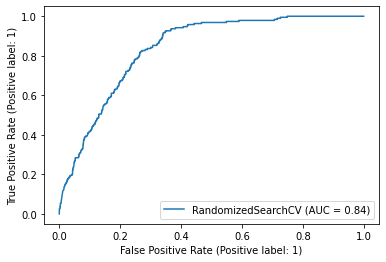

In [20]:
plot_roc_curve(rf_rs_2, X_test_encoded ,y_test)

In [21]:
y_preds = rf_rs_2.predict(X_test_encoded)
y_preds

print(classification_report(y_test,y_preds));

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      2894
           1       0.13      0.95      0.23       190

    accuracy                           0.61      3084
   macro avg       0.56      0.77      0.48      3084
weighted avg       0.94      0.61      0.70      3084



                             Feature  Importance
62               NumberOfSuppliments    0.026364
66                         Date_Diff    0.027877
50  AddressChange_Claim_2 to 3 years    0.207543
9                  Fault_Third Party    0.311882
61              BasePolicy_Liability    0.366680


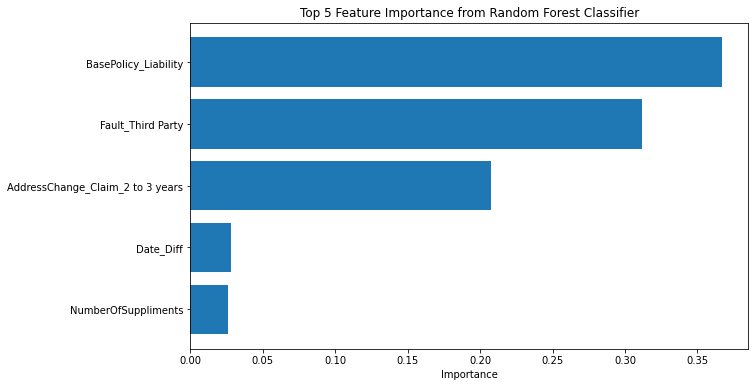

In [40]:
# Access the best estimator from the randomized search
best_rf_model = rf_rs_2.best_estimator_

# Fit the best model to the training data
best_rf_model.fit(X_train_encoded, y_train)

# Get feature importances
feature_importances = best_rf_model.feature_importances_

one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_columns)
feature_names = np.concatenate([one_hot_feature_names, X_train.columns[len(categorical_columns):]])

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)[-5:]


# Print or visualize the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Feature Importance from Random Forest Classifier')
plt.show()

